<a href="https://colab.research.google.com/github/2023garvitshrivastava-sketch/ML_lab/blob/main/Linear_Reg2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as LinearRegression
from sklearn.linear_model import Lasso, Ridge

In [17]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abhishek14398/salary-dataset-simple-linear-regression")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/salary-dataset-simple-linear-regression


In [18]:
df = pd.read_csv("Salary_dataset.csv")
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [19]:
YOE = df['YearsExperience']
Salary = df['Salary']



In [20]:
model = LinearRegression.LinearRegression()
model.fit(YOE.values.reshape(-1,1),Salary)

LinearRegression()

In [21]:

intercept = model.intercept_
slope = model.coef_[0]

print(f"Intercept: {intercept}")
print(f"Slope: {slope}")

Intercept: 24848.203966523193
Slope: 9449.962321455077


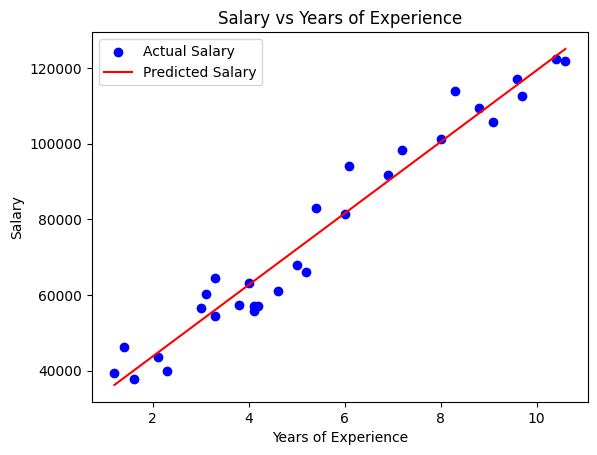

In [22]:
predicted_salary = model.predict(YOE.values.reshape(-1,1))
plt.scatter(YOE, Salary, color='blue', label='Actual Salary')
plt.plot(YOE, predicted_salary, color='red', label='Predicted Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Years of Experience')
plt.legend()

Lasso Intercept: 24855.15737072264
Lasso Slope: 9448.677825605426


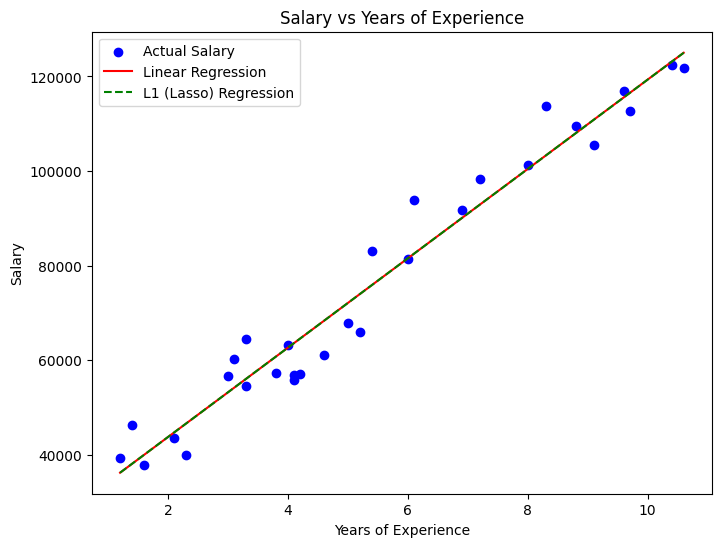

In [30]:

# ----- L1 Regularized Regression (Lasso) -----
lasso = Lasso(alpha=10)  # alpha is λ; adjust for more/less shrinkage
lasso.fit(YOE.values.reshape(-1,1), Salary)

print(f"Lasso Intercept: {lasso.intercept_}")
print(f"Lasso Slope: {lasso.coef_[0]}")

predicted_salary_lasso = lasso.predict(YOE.values.reshape(-1,1))

plt.figure(figsize=(8,6))
plt.scatter(YOE, Salary, color='blue', label='Actual Salary')
plt.plot(YOE, predicted_salary, color='red', label='Linear Regression')
plt.plot(YOE, predicted_salary_lasso, color='green', linestyle='--', label='L1 (Lasso) Regression')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Years of Experience')
plt.legend()
plt.show()

Ridge Intercept: 40184.75930382227
Ridge Slope: 6616.854808407218


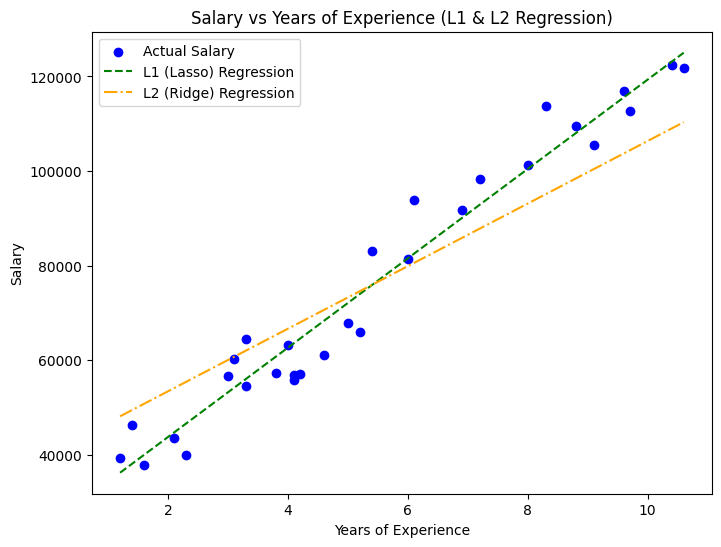

In [31]:
ridge = Ridge(alpha=100)  # Same alpha for comparison
ridge.fit(YOE.values.reshape(-1,1), Salary)
predicted_salary_ridge = ridge.predict(YOE.values.reshape(-1,1))

print(f"Ridge Intercept: {ridge.intercept_}")
print(f"Ridge Slope: {ridge.coef_[0]}")
plt.figure(figsize=(8,6))
plt.scatter(YOE, Salary, color='blue', label='Actual Salary')
plt.plot(YOE, predicted_salary_lasso, color='green', linestyle='--', label='L1 (Lasso) Regression')
plt.plot(YOE, predicted_salary_ridge, color='orange', linestyle='-.', label='L2 (Ridge) Regression')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Years of Experience (L1 & L2 Regression)')
plt.legend()
plt.show()